# Time Series Forecasting with XGBoost / GBRT

In [1]:
from random import gauss
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
sys.path.insert(2,'..')
import functions
import xgboost as xgb
from sklearn import preprocessing
import annualized_rv as arv
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor # Random Forest model
from sklearn.ensemble import GradientBoostingRegressor # Gradient Boosting model
from sklearn.ensemble import AdaBoostRegressor # AdaBoost model
import sklearn.ensemble as ensemble

import tensorflow as tf
from tensorflow import keras

import DataProcess

In [2]:
# reads in the historic implied vol data calculated in the dailyaverageIV notebook

aaplHistIV = pd.read_pickle('historicImpliedVolData/aapl_mean_iv_2017_2022.pkl')
googHistIV = pd.read_pickle('historicImpliedVolData/goog_mean_iv_2017_2022.pkl')
msftHistIV = pd.read_pickle('historicImpliedVolData/msft_mean_iv_2017_2022.pkl')
ndxHistIV = pd.read_pickle('historicImpliedVolData/ndx_mean_iv_2017_2022.pkl')
spyHistIV = pd.read_pickle('historicImpliedVolData/spc_mean_iv_2017_2022.pkl')




In [3]:

X_train, X_test, y_train, y_test = DataProcess.preprocess_data(spyHistIV, 'SPY', seq_length=60, splits=5, window=21) #preprocess spy 
#reshape data for xgboost
X_train_reshape = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test_reshape = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])

In [4]:
def modelandeval(model,X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_test = np.array(y_test)  # Ensure y_test is a numpy array for consistency
    
    DataProcess.evaluate_regression_metrics(y_test, y_pred)
    DataProcess.plot(y_test, y_pred)
    return None
    

MSE: 0.04844440673627716
RMSE: 0.22010090126184664
MAE: 0.17330538868969106
R2: 0.4786301734669097


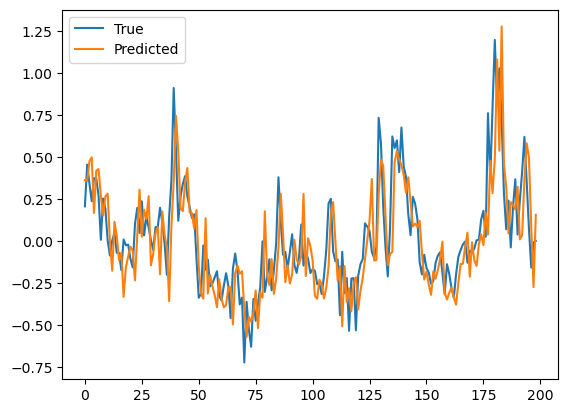

In [5]:
#XGBoost model

model = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=1000)
modelandeval(model,X_train_reshape, X_test_reshape, y_train, y_test)

MSE: 0.04008839056543537
RMSE: 0.2002208544718441
MAE: 0.15663044868741297
R2: 0.5685595377631


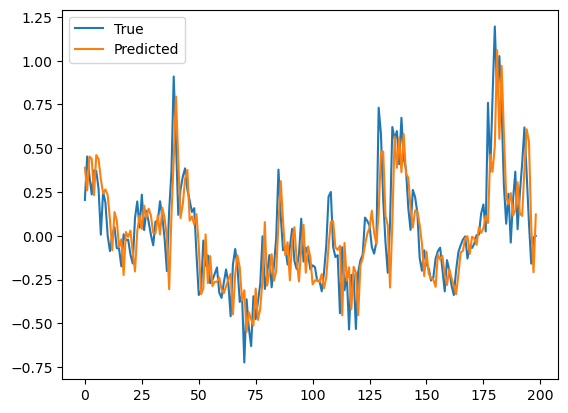

In [6]:
#RandomForestModel
model = ensemble.RandomForestRegressor(n_estimators=100) # reccomended forest tree size
modelandeval(model,X_train_reshape, X_test_reshape, y_train, y_test)

MSE: 0.04059924258689798
RMSE: 0.20149253729827807
MAE: 0.1531819118015157
R2: 0.5630616310333517


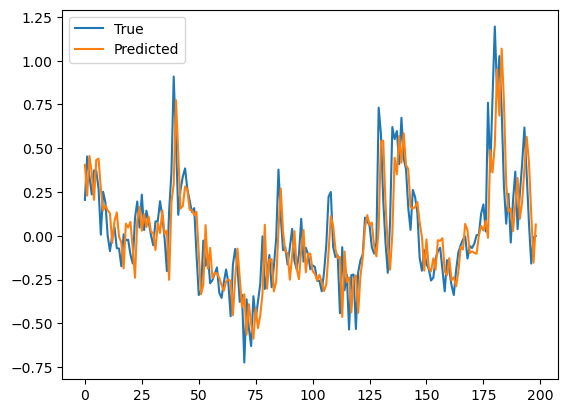

In [7]:
#GBRT Model
model =ensemble.GradientBoostingRegressor()
modelandeval(model,X_train_reshape, X_test_reshape, y_train, y_test)


MSE: 0.06148077374012966
RMSE: 0.24795316844140078
MAE: 0.19671041774059256
R2: 0.33832979905174354


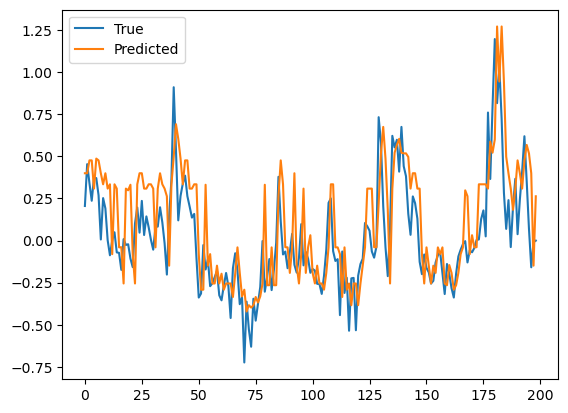

In [8]:
#AdaBoost Model
model = ensemble.AdaBoostRegressor()
modelandeval(model,X_train_reshape, X_test_reshape, y_train, y_test)

MSE: 0.05132860420866898
RMSE: 0.22655816959153996
MAE: 0.17864067153068683
R2: 0.4475897781524586


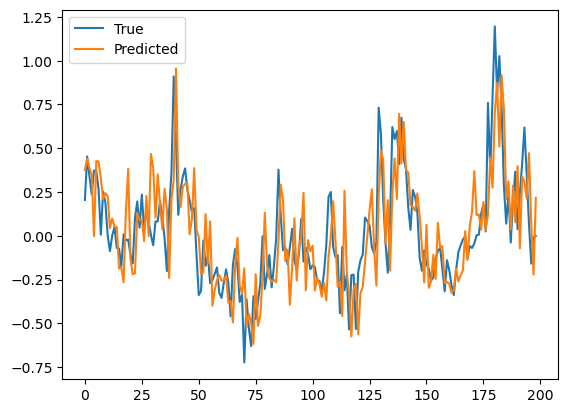

In [9]:
#STACKING MODEL 

estimators = [
    ('rf', ensemble.RandomForestRegressor(n_estimators=100)),
    ('gbrt', ensemble.GradientBoostingRegressor()),
    ('xgb', xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=1000))
]

model = ensemble.StackingRegressor(estimators=estimators, final_estimator=ensemble.RandomForestRegressor(n_estimators=100))
modelandeval(model,X_train_reshape, X_test_reshape, y_train, y_test)

Epoch 1/50


C:\Users\Ahmed\miniconda3\envs\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.8139
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.1842
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1288
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1186
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1258
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0935
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1050
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0924
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0730
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1163
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0837
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0955
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0754
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0704
Epoch 15/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0835
Epoch 16/50
32/

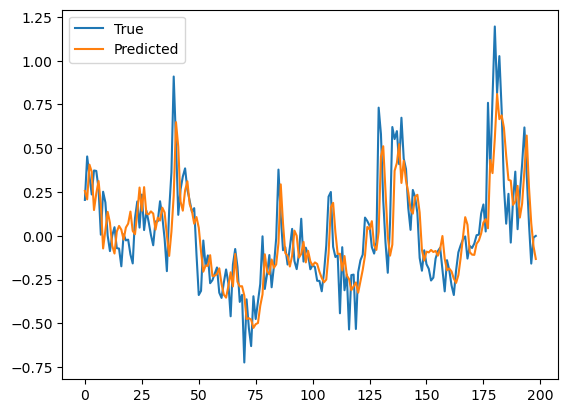

In [11]:
#LSTM Model
seq_length = 100

model = keras.models.Sequential([
    keras.layers.LSTM(seq_length, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    keras.layers.LSTM(seq_length),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

# pass tensors instead of numpy arrays
X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor = map(lambda x: tf.convert_to_tensor(x, dtype=tf.float32), [X_train, y_train, X_test, y_test])
model.fit(X_train_tensor, y_train_tensor, epochs=50, batch_size=32)
y_pred = model.predict(X_test_tensor)
y_test_tensor = np.array(y_test_tensor)  # Ensure y_test is a numpy array for consistency

DataProcess.evaluate_regression_metrics(y_test_tensor, y_pred)
DataProcess.plot(y_test_tensor, y_pred)

# Evaluation

# Using other data

In [ ]:

X_train, X_test, y_train, y_test = DataProcess.preprocess_data(aaplHistIV, 'AAPL', seq_length=60, splits=5, window=21)

model = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=1000)
modelandeval(model,X_train, X_test, y_train, y_test)

In [ ]:
X_train, X_test, y_train, y_test = DataProcess.preprocess_data(spyHistIV, 'SPY', seq_length=60, splits=5, window=21)


In [ ]:
X_train, X_test, y_train, y_test = DataProcess.preprocess_data(googHistIV, 'GOOG', seq_length=60, splits=5, window=21)

model = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=1000)
modelandeval(model,X_train, X_test, y_train, y_test)

In [ ]:
X_train, X_test, y_train, y_test = DataProcess.preprocess_data(spyHistIV, 'SPY', seq_length=60, splits=5, window=21)

model = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=1000)
modelandeval(model,X_train, X_test, y_train, y_test)

In [ ]:
X_train, X_test, y_train, y_test = DataProcess.preprocess_data(ndxHistIV, 'NDX', seq_length=60, splits=5, window=21)

model = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=1000)
modelandeval(model,X_train, X_test, y_train, y_test)

# Time Series Forecasting with GBRT